# Classificação

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [8]:
# Load da Base no Dataframe Pandas
df_draft = pd.read_csv('../data/clean_nfl_draft.csv')
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,carrer_years
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Florida St.,2.0
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0.0,Oregon,2.0
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,2.0
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0.0,Alabama,2.0
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa,2.0


In [16]:
#Drop de labels específicas
drop_labels = ['C', 'T', 'G', 'K', 'P']
for label in drop_labels:
    df_draft.drop(df_draft.index[df_draft['Position Standard'] == label], inplace = True)
    
idx_sk = list(df_draft.columns).index('Sk')
idx_cmp = list(df_draft.columns).index('Cmp')

labels_class = df_draft.columns[idx_cmp:idx_sk+1]

#### Train Test Split

In [20]:
#Definimos as variáveis X e Y que serão usadas no modelo
X = df_draft[labels_class]
y = df_draft['Position Standard']

#Separamos quanto dos dados será usado para treino e quanto será usado para teste.
#Nesse caso, 33% dos dados estarão dedicados à teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

NameError: name 'train_test_split' is not defined

## Decision Trees

In [25]:
#Utilizamos o modelo de árvore de decisão
dtree = DecisionTreeClassifier()

#Treinamento do modelo
dtree.fit(X_train,y_train)

NameError: name 'DecisionTreeClassifier' is not defined

#### Prediction and Evaluation

In [27]:
#Rodamos o modelo que acabamos de treinar e realizamos a predição de fato
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))

NameError: name 'dtree' is not defined

In [28]:
#Matriz de confusão
print(confusion_matrix(y_test,predictions))

NameError: name 'confusion_matrix' is not defined

## Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier

#Semelhante ao que fizemos acima, treinamos um outro modelo. Agora, será usado o Random Forests
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(X_train,y_train)

ModuleNotFoundError: No module named 'sklearn'

In [31]:
#Analogamente, realizados a predição
rf_class_predict = rf_class.predict(X_test)

print(classification_report(y_test,rf_class_predict))

NameError: name 'rf_class' is not defined

In [32]:
#Matriz de Confusão
print(confusion_matrix(y_test,rf_class_predict))

NameError: name 'confusion_matrix' is not defined

## KNN - K Nearest Neigbhors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Escolhemos, então, um terceiro modelo. Dessa vez será usado o KNN
scaler = StandardScaler()
scaler.fit(X)

ModuleNotFoundError: No module named 'sklearn'

In [35]:
scaled_features = scaler.transform(X) 

df_feat = pd.DataFrame(scaled_features, columns=labels_class)
df_feat.head()

NameError: name 'scaler' is not defined

#### Train Test Split

In [36]:
#Separação dos dados em treino e teste. 33% da base estará dedicada à teste.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(scaled_features, y, test_size = 0.33)

NameError: name 'train_test_split' is not defined

In [40]:
#Treinamento do KNN
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train_knn, y_train_knn)

NameError: name 'KNeighborsClassifier' is not defined

In [42]:
#Mais uma vez realizamos a predição do modelo
predicition_knn = knn.predict(X_test_knn)

NameError: name 'knn' is not defined

#### Prediction and Evaluation

In [43]:
#Matriz de confusão e resultados para K = 1
print("K = 1")
print('\n')
print(confusion_matrix(y_test_knn, predicition_knn))
print('\n')
print(classification_report(y_test_knn,predicition_knn))

K = 1




NameError: name 'confusion_matrix' is not defined

#### Escolhendo o melhor K

In [44]:
error = []

#Com o objetivo de melhorar os resultados, rodamos o KNN diversas vezes com valores diferentes para o parâmetro K
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,y_train_knn)
    pred_i = knn.predict(X_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

NameError: name 'KNeighborsClassifier' is not defined

ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

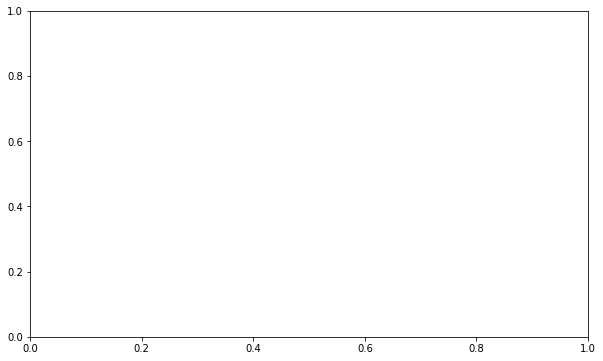

In [47]:
#Abaixo é mostrado um gráfico da taxa de erro encontrada nos resultados do modelo
#para cada valor de K escolhido anteriormente
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Error')

In [45]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train_knn, y_train_knn)
predicition_knn_23 = knn.predict(X_test_knn)

#Matriz de confusão e reusltados para o modelo com K = 23
print("K = 23")
print('\n')
print(confusion_matrix(y_test_knn, predicition_knn_23))
print('\n')
print(classification_report(y_test_knn,predicition_knn_23))

NameError: name 'KNeighborsClassifier' is not defined